In [42]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [43]:
def reading_file(path):
    #variable path is a string which contains the address of .csv file 
    filePath=open(path)
    df=pd.read_csv(filePath)
    #return the dataframe
    return df

In [44]:
#reading the first 5 lines in the cliniical trial data frame
clinical_df=reading_file("raw_data/clinicaltrial_data.csv")
clinical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [45]:
#reading in the mouse drug data file
mouse_drug_df=reading_file("raw_data/mouse_drug_data.csv")
mouse_drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [46]:
#mouse_clinic_df.groupby(["Mouse ID"]).mean()
mouse_clinic_df = clinical_df.merge(mouse_drug_df,on="Mouse ID")
mouse_clinic_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [47]:
#resetting index
drug_table = mouse_clinic_df.pivot_table(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)', aggfunc=np.mean)
drug_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [48]:
#Ima ( smile) binning and dropping the unwanted data
# Note to self: Need an emoji library in Jupyter!
drugs=["Capomulin","Placebo","Infubinol","Ketapril"]
markers=["o","D","8","s"]
colors=["r","b","g","black"]

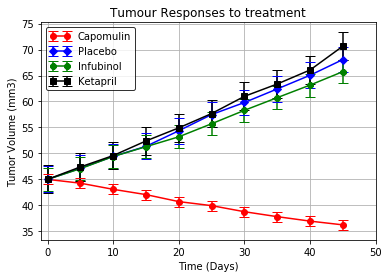

In [49]:
 #tumor volume changes over time for each treatment.
fig,ax=plt.subplots()
i=0
for drug in drugs:    
    # Plot error bars using x axis timepoint and y axis tumour volume mean
    ax.errorbar(drug_table.index.values, drug_table[drug],yerr=drug_table[drug].sem(),marker=markers[i],c=colors[i], linestyle='-',capsize=5)
    #set xlimit
    ax.set_xlim(ax.set_xlim(-1,50))
    # set xlabel and ylabel and title
    ax.set_xlabel("Time (Days)")
    ax.set_ylabel("Tumor Volume (mm3)")
    ax.set_title("Tumour Responses to treatment")
    #set legend 
    ax.legend(numpoints=2, loc='best', fancybox=True, edgecolor="black")
    ax.grid(linestyle="solid")
    i=i+1

plt.show()

In [50]:
# You must include a written description of three observable trends based on the data.
# 1. The most keenly observable fact is that the drug Capomulin reduced the size of the tumor from 45mm3 to 32mm3
# 2. The drug Ketapril seems worse than the Placebo, although statistical significance needs to be established
# 3. Both Infubinol and Ketapril have increased the volume of the tumors suggesting that there is no 
#    difference between those two drugs

In [51]:
#create pivot table for metastatic responses
meta_table = mouse_clinic_df.pivot_table(index=['Drug',"Timepoint"], values='Metastatic Sites', aggfunc=np.mean)
meta_table.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [52]:
#creating a pivot table with mean values for each drug used
drug_table_meta = mouse_clinic_df.pivot_table(index='Timepoint', columns='Drug', values='Metastatic Sites', aggfunc=np.mean)
drug_table_meta

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


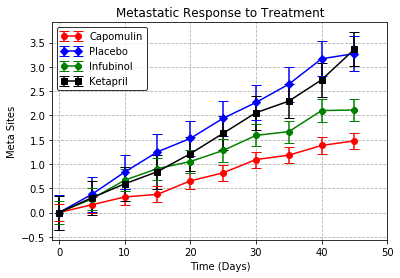

In [53]:

fig, ax = plt.subplots()
i=0
for drug in drugs:    
    ax.errorbar(drug_table_meta.index.values, drug_table_meta[drug],yerr=drug_table_meta[drug].sem(),marker=markers[i],c=colors[i], linestyle='-',capsize=5)
    ax.set_xlim(-1,50)
    # set xlabel and ylabel and title
    ax.set_xlabel("Time (Days)")
    ax.set_ylabel("Meta Sites")
    ax.set_title("Metastatic Response to Treatment")
     #set legend 
    ax.legend(numpoints=2, loc='best', fancybox=True, edgecolor="black")
    ax.grid(linestyle="dashed")
    i=i+1

#plt.style.use("seaborn-whitegrid")
plt.show()

In [54]:
#Survival during treatment
count_cap=mouse_clinic_df.loc[mouse_clinic_df["Drug"]=="Capomulin" ]
count_cap.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [59]:
#creating a data frame with aggregate function
df2=mouse_clinic_df.pivot_table(index='Timepoint',values="Mouse ID", columns='Drug', aggfunc=lambda x: len(x.value_counts()))
   # drug_table_meta = mouse_clinic_df.pivot_table(index='Timepoint', columns='Drug', values='Metastatic Sites', aggfunc=np.mean)
df2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [61]:

drug_table_surv =df2.apply(lambda x: x*100/25,axis=1)
drug_table_surv

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,64.0,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,64.0,92.0,80.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


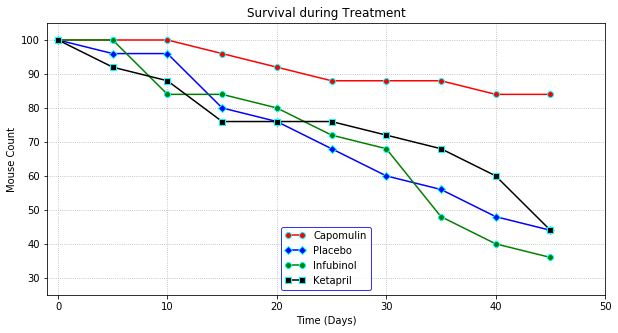

In [67]:
#plotting survival data
fig, ax = plt.subplots(figsize=(10,5))
i=0
for drug in drugs:    
    ax.plot(drug_table_surv.index.values, drug_table_surv[drug],marker=markers[i],c=colors[i], linestyle='-',markeredgecolor='cyan')
    ax.set_xlim(-1,50)
    ax.set_ylim(25,105)
    ax.set_xlabel("Time (Days)")
    ax.set_ylabel("Mouse Count")
    ax.set_title("Survival during Treatment")
    ax.legend(numpoints=2, loc='lower center', fancybox=True, edgecolor="blue")
    
   
    i=i+1
ax.grid(linestyle="dotted")
plt.show()

In [68]:
#Survival During Treatment:
# 1. Mice treated with Capomulin drug, has highest survival rate .
# 2. Infubinol resulted in the lowest survival by 45th day.
# 3. Placebo and Ketapril has the the same survival rate at the end of 45 days.

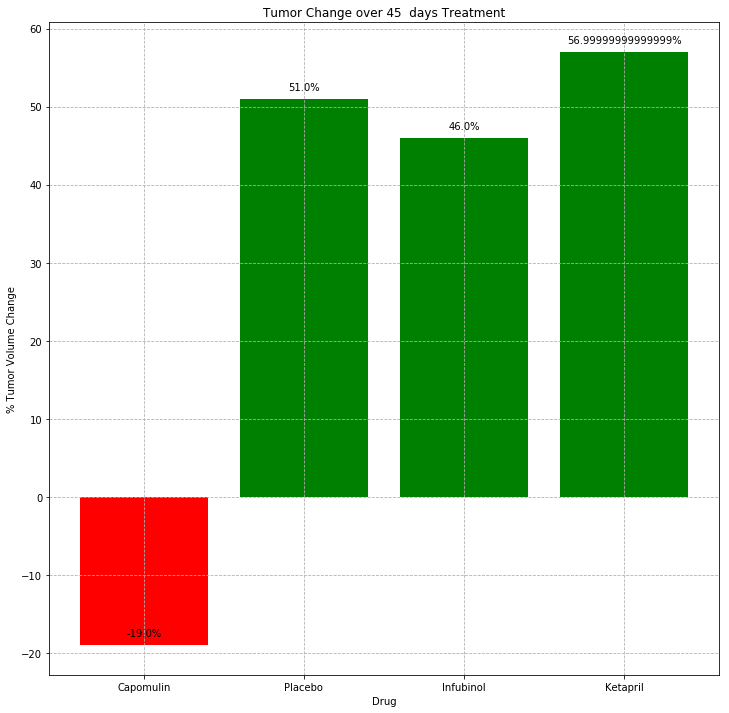

In [74]:
last=drug_table.loc[drug_table.index.values==45]
first=drug_table.loc[drug_table.index.values==0]
diff=(round((last.iloc[0]-first.iloc[0])/first.iloc[0],2))*100
diff=diff[drugs]
x_axis = np.arange(len(diff.index.values))
tick_locations = [value+0.4 for value in x_axis]
fig,ax=plt.subplots(figsize=(12,12))
plt.xticks(tick_locations, diff.index.values, rotation="horizontal")
colors = ['green' if _y >=0 else 'red' for _y in diff.values]
rect=plt.bar(diff.index.values, diff.values, color=colors, alpha=1, align="edge")
plt.grid()
plt.title("Tumor Change over 45  days Treatment")
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change")
ax.grid(linestyle="dashed")


def autolabel(rects, ax):
    j=0
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                str(diff.values[j])+"%",
                ha='center', va='bottom')
        j+=1
autolabel(rect,ax)
plt.show()

In [ ]:
# Observable Trends
# 0. What the hell kind of drug is Ketapril????  The company should just shut down! :-)
# 1. Ketapril is the worst drug by far for tumor reduction
# 2. Capomulin seems to be the best drug both for tumor reduction and survival rate
# 3. Both Infubinol and Ketapril have increased the volume of the tumors suggesting that there is no 
#    difference between those two drugs